# Dataset Description
<hr />

#### From https://www.kaggle.com/crawford/gene-expression:  This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL). 

#### There are training dataset contains 38 samples and the test dataset contains 34 sample used in the paper. Both datasets contain ALL and AML sample measurements from Bone Marrow and Peripheral Blood. According to Kaggle and the paper, intensity values have been re-scaled such that overall intensities for each chip are equivalent.

#### Acknowledgments

#### Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression

#### Science 286:531-537. (1999). Published: 1999.10.14

#### T.R. Golub, D.K. Slonim, P. Tamayo, C. Huard, M. Gaasenbeek, J.P. Mesirov, H. Coller, M. Loh, J.R. Downing, M.A. Caligiuri, C.D. Bloomfield, and E.S. Lander

In [1]:
import pandas as pd
from matplotlib import pyplot

In [2]:
# Load the Dataset

test_data=pd.read_csv('data_set_ALL_AML_independent.csv')
training_data=pd.read_csv('data_set_ALL_AML_train.csv')
patient_cancer_labels=pd.read_csv('actual.csv')

In [3]:
# Dataset Analysis

#### shape 
training_data_shape = training_data.shape
test_data_shape = test_data.shape
patient_cancer_shape = patient_cancer_labels.shape
print("Training Data Shape: %s rows, %s columns" % (training_data_shape[0], training_data_shape[1]))
print("Testing Data Shape: %s rows,%s columns" % (test_data_shape[0], test_data_shape[1]))
print("Patient Cancer Label Data Shape: %s rows,%s columns" % (patient_cancer_shape[0], patient_cancer_shape[1]))

Training Data Shape: 7129 rows, 78 columns
Testing Data Shape: 7129 rows,70 columns
Patient Cancer Label Data Shape: 72 rows,2 columns


In [4]:
#### First 5 rows
training_data.head()


,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [5]:
#### First 5 rows
test_data.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [6]:
patient_cancer_labels.head(5)

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [7]:
print(patient_cancer_labels.groupby('cancer').size())

cancer
ALL    47
AML    25
dtype: int64


In [8]:
#### The columns labeled as "call" do not seem to help with classification so they can be filtered out

def drop_columns_containing_call(df):
    return [col for col in df.columns if "call" not in col]

training_data=training_data[drop_columns_containing_call(training_data)]
test_data=test_data[drop_columns_containing_call(test_data)]
training_data=training_data.drop("Gene Description", axis=1)
test_data=test_data.drop("Gene Description", axis=1)

#### Transpose both training and testing dataframes. This makes each gene a feature for the machine learning models. Each row represents a sample and the values represent the microarray data

test_data = test_data.T
training_data = training_data.T

test_data.columns = test_data.iloc[0]
training_data.columns = training_data.iloc[0]
test_data = test_data.drop(test_data.index[0]).apply(pd.to_numeric)
training_data = training_data.drop(training_data.index[0]).apply(pd.to_numeric)

training_data_shape = training_data.shape
test_data_shape = test_data.shape

In [9]:
print(training_data.shape)
training_data.head()

(38, 7129)


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [10]:
training_data.describe().round()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,...,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0
mean,-121.0,-151.0,-17.0,181.0,-277.0,-439.0,-44.0,-201.0,99.0,112.0,...,179.0,751.0,9.0,399.0,-20.0,869.0,336.0,19.0,504.0,-29.0
std,110.0,76.0,118.0,117.0,111.0,135.0,219.0,91.0,83.0,212.0,...,85.0,298.0,77.0,470.0,42.0,482.0,210.0,31.0,729.0,31.0
min,-476.0,-327.0,-307.0,-36.0,-541.0,-790.0,-479.0,-463.0,-82.0,-215.0,...,30.0,224.0,-178.0,36.0,-112.0,195.0,41.0,-50.0,-2.0,-94.0
25%,-139.0,-205.0,-83.0,81.0,-374.0,-547.0,-169.0,-239.0,36.0,-47.0,...,120.0,576.0,-43.0,174.0,-48.0,595.0,233.0,8.0,136.0,-43.0
50%,-106.0,-142.0,-44.0,200.0,-263.0,-426.0,-34.0,-186.0,100.0,70.0,...,174.0,700.0,10.0,266.0,-18.0,744.0,308.0,20.0,244.0,-26.0
75%,-68.0,-95.0,47.0,279.0,-189.0,-345.0,79.0,-145.0,152.0,243.0,...,232.0,970.0,57.0,452.0,9.0,1112.0,390.0,30.0,487.0,-12.0
max,17.0,-20.0,265.0,392.0,-51.0,-155.0,419.0,-24.0,283.0,561.0,...,356.0,1653.0,218.0,2527.0,52.0,2315.0,1109.0,115.0,3193.0,36.0


In [11]:
training_sample = training_data.sample(n=50, axis=1)
training_sample.describe().round()

Gene Accession Number,Z47556_rna2_at,HG2271-HT2367_at,L37936_at,M13058_s_at,U48437_at,D79991_at,U20998_at,L17330_at,AF006087_at,U89355_at,...,Z83799_at,U28963_at,D29958_at,X80754_at,U34880_at,X92106_at,U14187_at,M81601_at,U70732_rna1_at,U14577_s_at
count,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,...,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0
mean,-161.0,-292.0,386.0,245.0,514.0,770.0,1469.0,29.0,579.0,191.0,...,-345.0,606.0,-140.0,1239.0,462.0,586.0,666.0,1502.0,-8.0,-332.0
std,58.0,141.0,211.0,91.0,277.0,214.0,990.0,186.0,365.0,117.0,...,173.0,218.0,168.0,292.0,252.0,245.0,234.0,700.0,300.0,256.0
min,-348.0,-621.0,66.0,71.0,46.0,322.0,407.0,-466.0,3.0,-1.0,...,-908.0,261.0,-548.0,624.0,-37.0,187.0,248.0,759.0,-726.0,-938.0
25%,-192.0,-372.0,274.0,181.0,309.0,638.0,711.0,-36.0,376.0,114.0,...,-435.0,456.0,-231.0,1077.0,310.0,462.0,482.0,1044.0,-210.0,-486.0
50%,-150.0,-294.0,365.0,230.0,504.0,762.0,1068.0,44.0,499.0,174.0,...,-350.0,574.0,-130.0,1248.0,434.0,529.0,599.0,1316.0,6.0,-326.0
75%,-124.0,-192.0,468.0,316.0,761.0,876.0,2235.0,155.0,623.0,268.0,...,-176.0,784.0,-0.0,1350.0,630.0,734.0,849.0,1694.0,172.0,-187.0
max,-57.0,-14.0,1066.0,468.0,1013.0,1360.0,4700.0,389.0,1693.0,603.0,...,-69.0,1072.0,201.0,2021.0,1026.0,1292.0,1164.0,4255.0,915.0,121.0


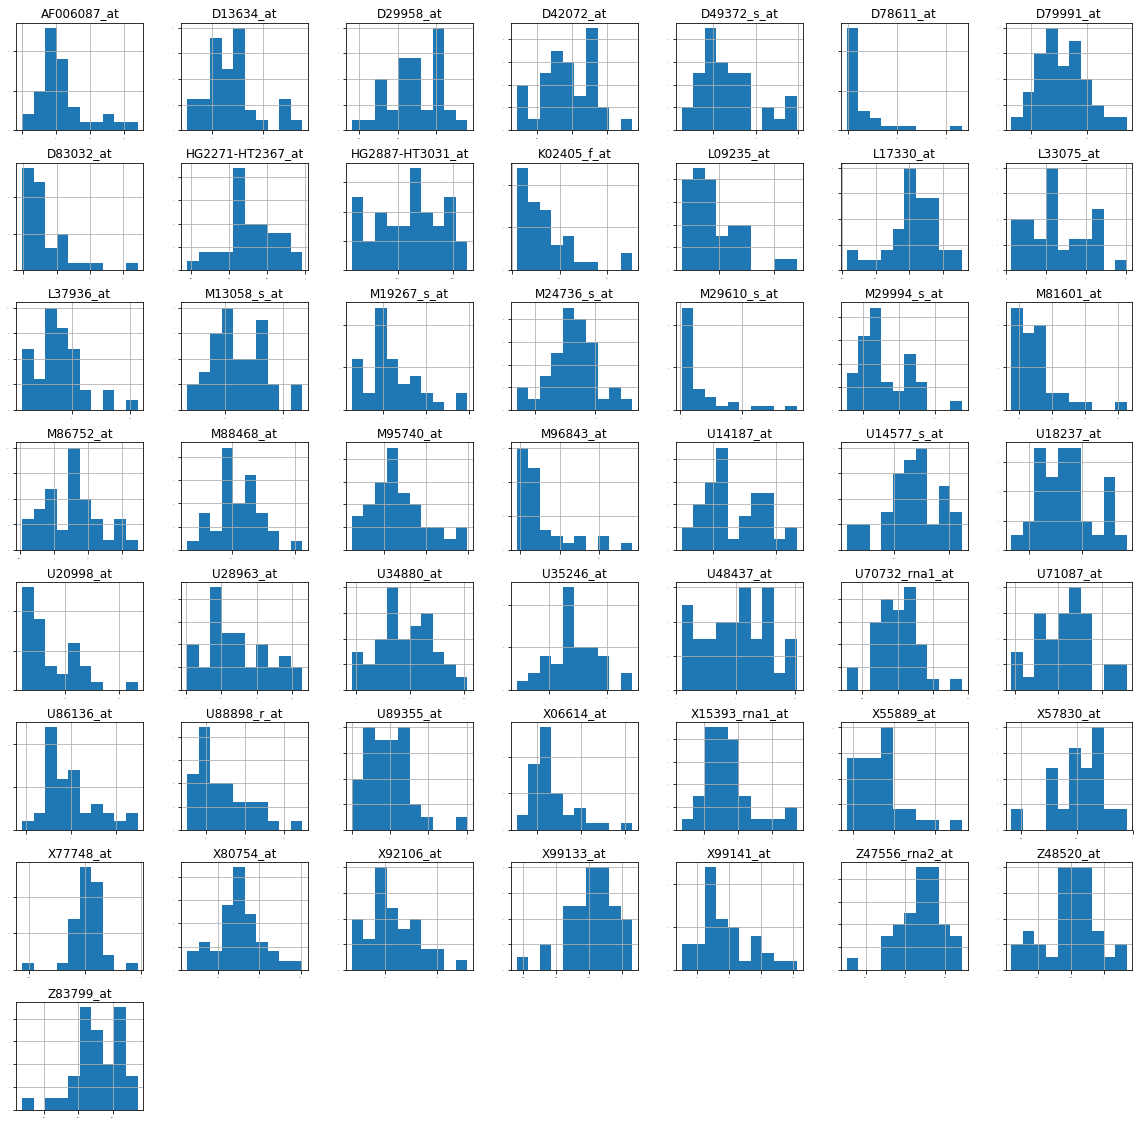

In [12]:
training_sample.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(20,20))
pyplot.show()

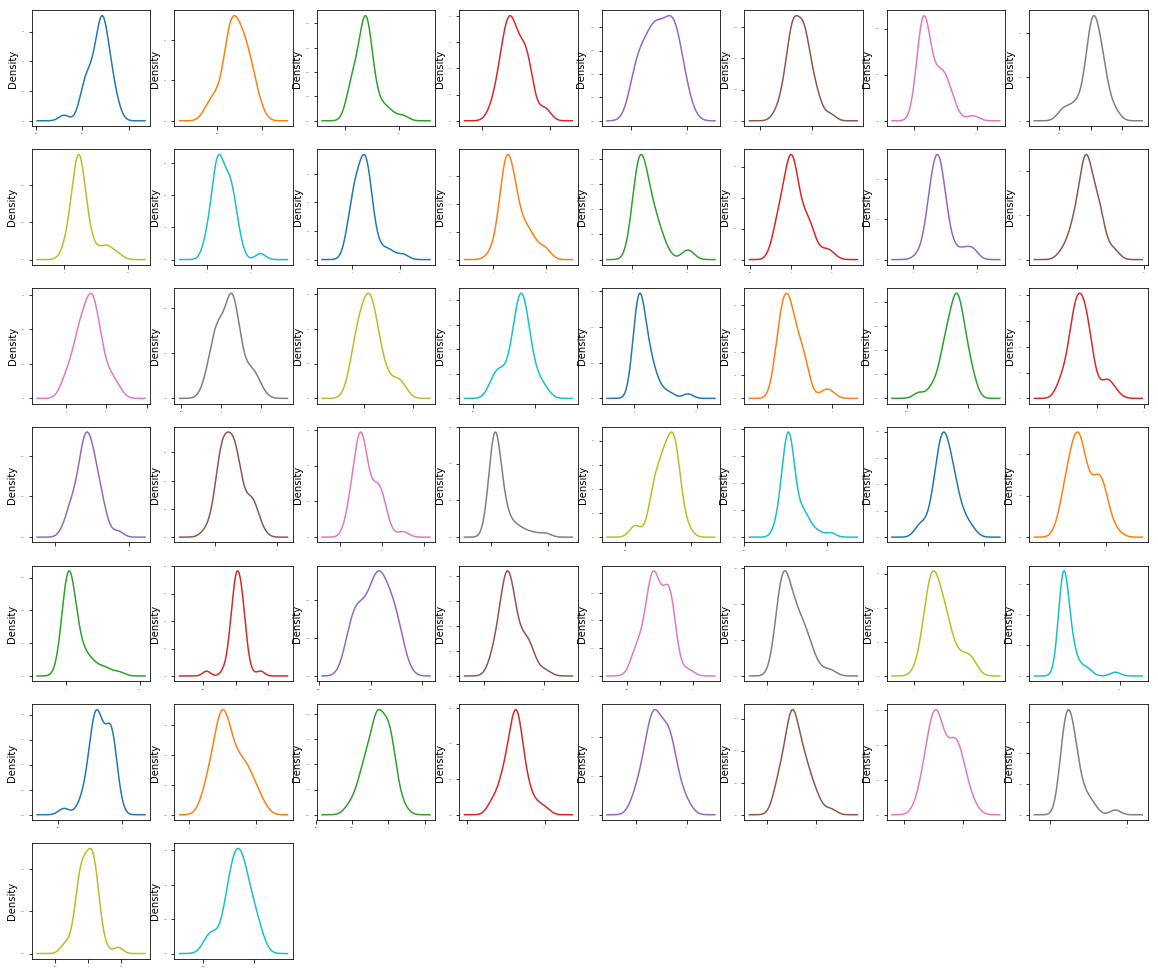

In [13]:
training_sample.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,
    fontsize=1, figsize=(20,20))
pyplot.show()

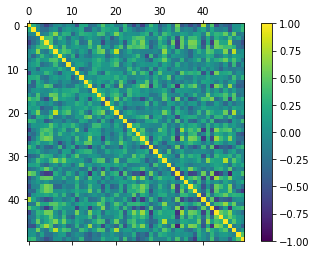

In [14]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(training_sample.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [19]:
from sklearn.model_selection import train_test_split
X = training_data.values[:,0:training_data_shape[1]].astype(float)
Y = patient_cancer_labels.values[0:training_data_shape[0]:,1]
validation_size = 0.20
seed=7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)